## Proportions of Farmer Organization Members by Village

### Introduction:
This notebook focuses on calculating the proportion of households in each village that are members of a farmer organization and visualizing this relationship. The dataset contains information about household membership status and the village to which each household belongs.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("qn1_corrected_data_exercise.csv")
data.head()

,hhNum,village,sex,age,educ,hhSize,landOwned,landCultivated,fo,income
0,1,A,male,68.705267,3,6,9.8,3.7,0,278.0
1,2,A,male,82.634070,1,5,7.1,7.0,1,936.0
2,3,A,male,24.376793,6,5,9.1,5.4,0,584.0
3,4,A,male,75.388073,1,5,7.6,5.6,0,567.0
4,5,A,male,71.947722,1,5,13.1,3.7,0,181.0


### Proportion Calculation:

1. First, the data was grouped by village and farmer organization membership status (1 for members and 0 for non-members).
2. For each village, the proportion of members was calculated as the number of member households divided by the total number of households in that village.

In [2]:
village_fo_proportions = data.groupby(['village', 'fo']).size().unstack(fill_value=0)
village_fo_proportions['Proportion of Members'] = village_fo_proportions[1] / (village_fo_proportions[0] + village_fo_proportions[1])

In [11]:
village_fo_proportions.describe()

fo,0,1,Proportion of Members
count,26.000000,26.000000,26.000000
mean,13.653846,4.807692,0.267723
std,4.344581,2.514267,0.134266
min,8.000000,0.000000,0.000000
25%,10.000000,4.000000,0.202632
50%,14.000000,5.000000,0.285714
75%,16.000000,6.000000,0.358235
max,21.000000,9.000000,0.466667


### Creating a Figure (Bar Plot):

To illustrate the relationship between household membership in a farmer organization and the proportion of households in each village that are members, a stacked bar chart is suitable for the task.  
Each village is represented on the x-axis, and the y-axis represents the proportion of households in each village that are members.
Stacked bars for each village show the proportion of non-members (blue) and members (orange).

### Interpretation of the Bar Plot:
  
The bar plot provides a clear visual representation of how the proportion of farmer organization members varies across different villages.
By comparing the heights of the blue and orange segments within each village, we can easily observe the proportion of non-members and members.
***Differences in bar heights between villages indicate variations in membership*** proportions, allowing for a straightforward comparison.

<Figure size 1200x500 with 0 Axes>

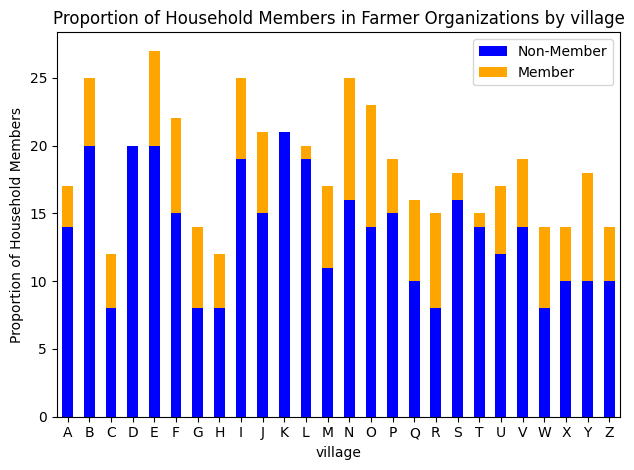

In [10]:
# Create a bar plot
plt.figure(figsize=(12, 5))
village_fo_proportions[[0,1]].plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.xlabel("village")
plt.ylabel("Proportion of Household Members")
plt.title("Proportion of Household Members in Farmer Organizations by village")
plt.xticks(rotation=0)
plt.legend(["Non-Member", "Member"])
plt.tight_layout()
plt.show()